In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
from utils import access_raster
from glob import glob
import re
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.stats import gaussian_kde
import seaborn as sns
import random
from scipy import optimize

In [3]:
model = "final_snowprob_1692788122_model_53_01269"
# model = "1684923533_model_57_012345678"
feature = "HS"
# predfile = "HS_diff.tif"
predfile = "HS_pred.tif"

hs_path = f"/home/abetatos/Escritorio/TFM_Dataset/3.Basedataset/{feature}"
modelpredspath = f"/home/abetatos/Escritorio/TFM_Dataset/5.Preds/{model}"

In [4]:
import pandas as pd

def get_slices(aux, precision): 
    df = pd.DataFrame(aux)
    df[0] = df[0].apply(lambda x: round(x, precision))
    arr = []
    for index, round_df in df.groupby(0):
        arr.append([index, round_df[1].mean()])
    return np.array(arr)

0.3881146013736725 1.0901480913162231
0.7825944423675537 3.1716127395629883
0.8403662443161011 3.4849154949188232
1.4977487325668335 6.45378303527832


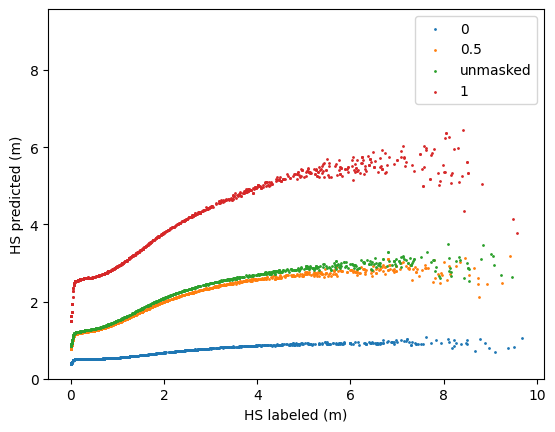

In [5]:
fig, ax = plt.subplots()
place = "HS_Davos_20170316_2m_epsg2056"

for i, feature in zip(["0", "0.5", "unmasked", "1"], ["0_HS_pred", "0.5HS_pred", "HS_pred", "1_HS_pred"]):
    
  
    feature_raster = access_raster(os.path.join(hs_path, place, f"HS.tif"))['array']
    pred_raster = access_raster(os.path.join(modelpredspath, place, feature+".tif"))['array']

    fr_flat = feature_raster.flatten()
    pr_flat = pred_raster.flatten()

    aux = [[fr, pr] for fr, pr in zip(fr_flat, pr_flat) if fr not in [0., -9999.] and pr not in [0., -9999.]]
    aux = get_slices(aux, 2)
    random.shuffle(aux)
    fr_flat, pr_flat = np.array(list(zip(*aux[:10000])))
    print(pr_flat.min(), pr_flat.max())
    
    ax.scatter(fr_flat, pr_flat, s=1, label=i)
    

ax.set_ylim((min(pr_flat.min(), fr_flat.min()), max(pr_flat.max(), fr_flat.max())))
ax.set_ylabel("HS predicted (m)")
ax.set_xlabel("HS labeled (m)")
ax.legend()
plt.show()